In [32]:
import dask_awkward as dak
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
load_path = "/depot/cms/users/yun79/results/stage1/test_full2/f1_0"
# sample = "vbf_powheg"
# sample = "ggh_powheg"
# sample = "dy_M-100To200"
sample = "data_A"
# full_load_path = load_path+f"/{sample}/*/*.parquet"
# full_load_path = load_path+f"/{sample}/0/*.parquet"
# full_load_path = f"/depot/cms/users/yun79/results/stage1/test_validation_bigV2/2018/f1_0/{sample}/*/*.parquet"
full_load_path = f"/depot/cms/users/yun79/results/stage1/test_validation_bigV2/2018/f0_1/{sample}/*/*.parquet"

df_new = dak.from_parquet(full_load_path) 
# region_cut = (df_new.h_peak | df_new.h_sidebands)
# df_new = df_new[region_cut]

In [56]:
! ls /depot/cms/users/yun79/results/stage1/test_validation_bigV2/2018/

f0_1  f0_2999999975166409  f1_0


In [46]:
! ls /depot/cms/users/yun79/results/stage1/test_validation_bigV2/2018/f1_0/

data_A	ggh_powheg  vbf_powheg


In [39]:
! ls /depot/cms/users/yun79/results/stage1/test_validation_bigV2/2018/f0_1

data_A


In [2]:
full_load_path = f"/depot/cms/users/yun79/hmm/test_validation_bigV1/stage1_output/2018/{sample}/*.parquet"
import dask.dataframe as dd
import pandas as pd
# df = dd.from_pandas(pd.DataFrame(), npartitions=1)
df_old = dd.read_parquet(full_load_path)
# region = df_old.region.compute()

In [33]:
binning_map = {
    "pt" : [25, 300, 50],
    "eta" : [-5, 5, 30],
    "phi" : [-3.1415, 3.1415, 101],
    "mass" : [0, 150, 100],
}
variables = ["mu1_pt","mu1_eta", "mu1_phi", 
             "jet1_pt", "jet1_eta", "jet1_phi"
            ]
weights_old = df_old["weights"].compute()
weights_new = ak.to_numpy((df_new["weights"]/df_new["fraction"]).compute())
if "ggh" in sample:
    print("ggh in sample!")
    nnlops_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/*/nnlops/wgt.parquet'
    nnlops_wgts = ak.from_parquet(nnlops_full_load_path)["nnlops_wgt"]
    weights_new = weights_new*nnlops_wgts



In [10]:
print(weights_new[0])
print(weights_old.iloc[0])

10.000000082778637
1.0


In [17]:
1/0.09999999917221364

10.000000082778637

In [12]:
len(weights_new)

952056

In [14]:
952056/10584191

0.08995075769135308

In [11]:
len(

entry
65        1.0
82        1.0
86        1.0
113       1.0
139       1.0
         ... 
101223    1.0
101245    1.0
101290    1.0
101368    1.0
101381    1.0
Name: weights, Length: 10584191, dtype: float64

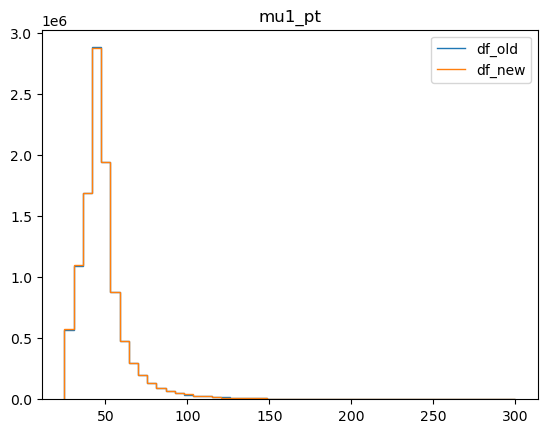

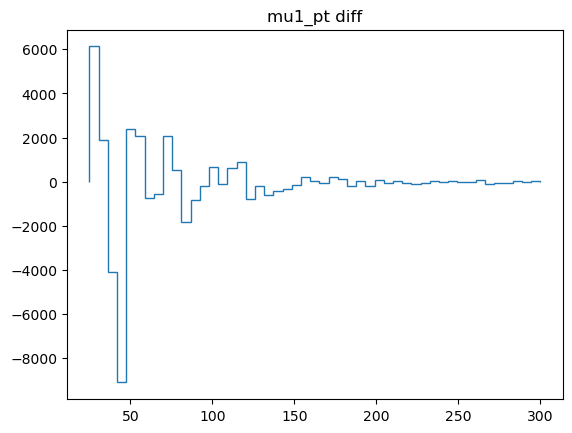

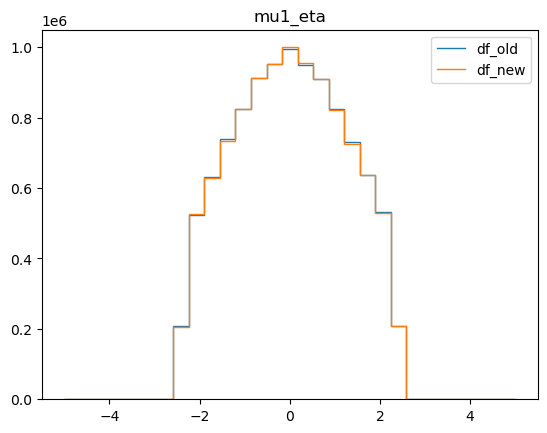

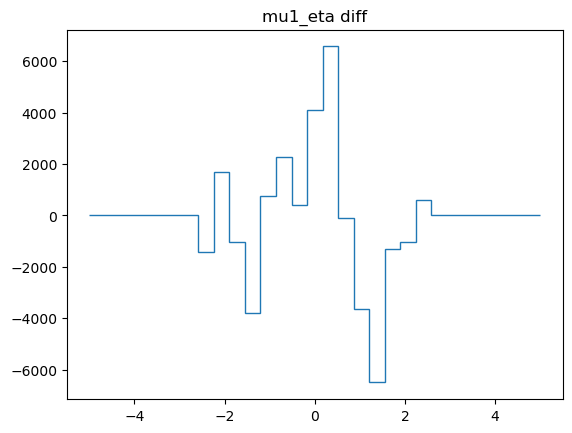

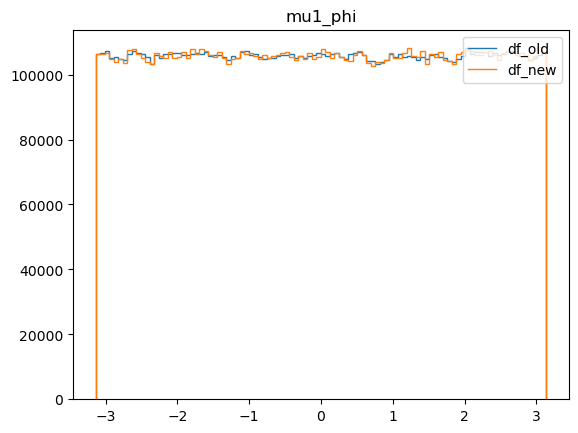

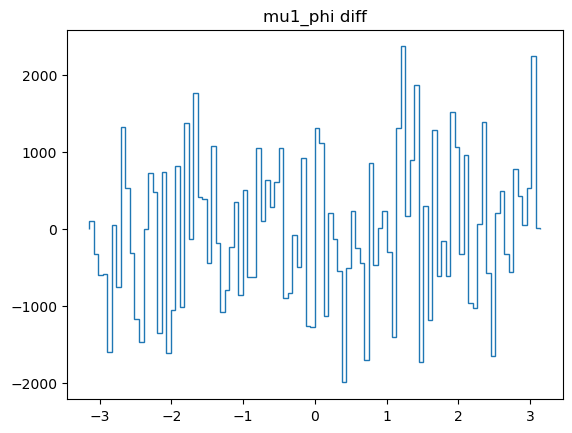

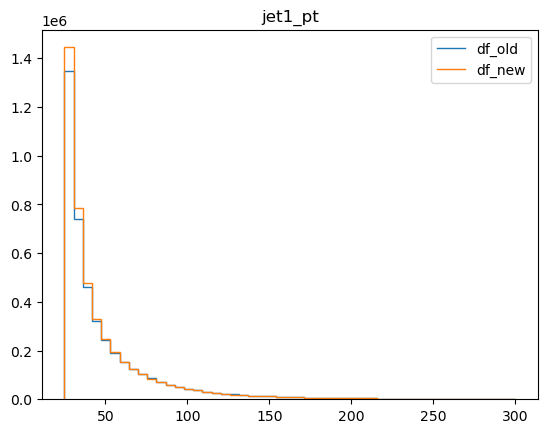

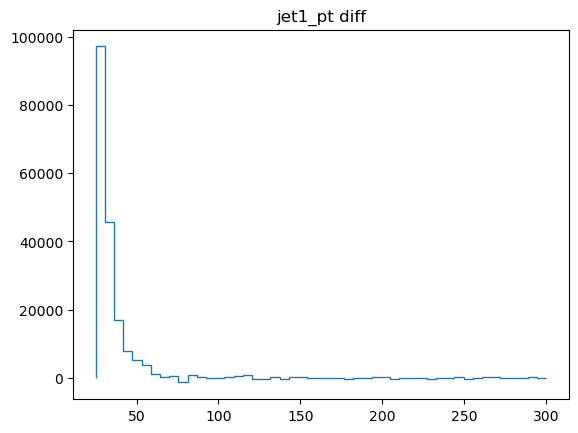

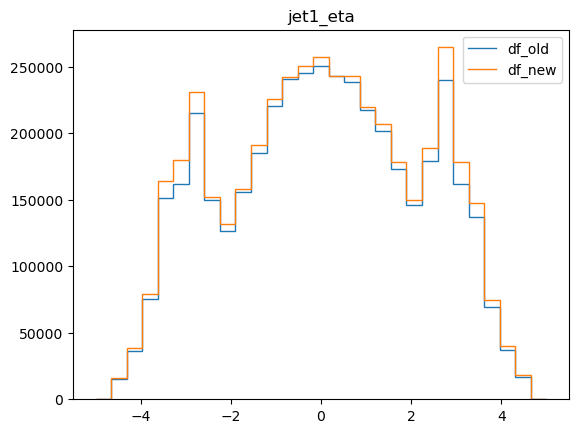

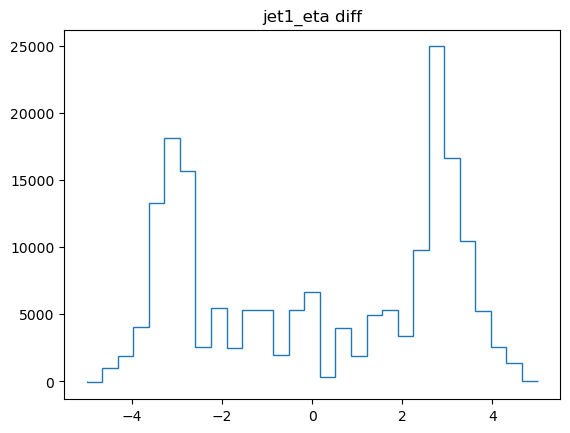

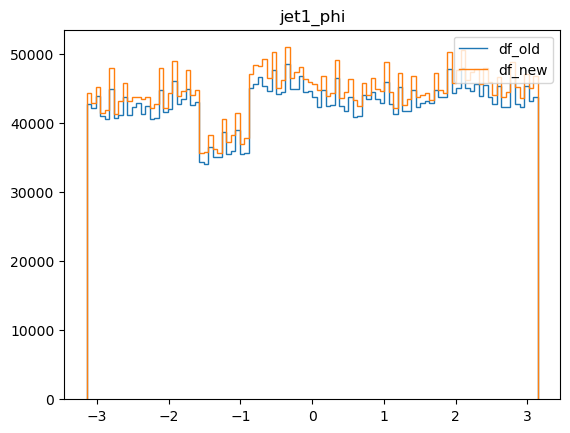

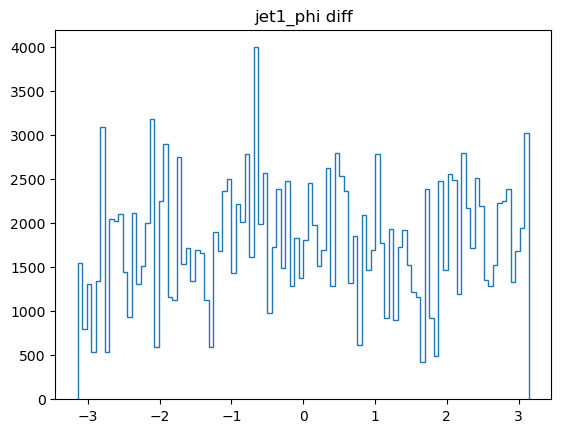

In [34]:
for var in variables:
    kin = var.split("_")[-1]
    # binning = np.linspace(*[25, 300, 50])
    binning = np.linspace(*binning_map[kin])
    # old_len = ak.num(df_old["mu1_pt"].compute(), axis=0)
    # new_len = ak.num(df_new["mu1_pt"].compute(), axis=0)
    # new_weights = np.ones(new_len)
    # new_weights = new_weights*old_len/new_len
    hist_old, edges = np.histogram(df_old[var].compute(), bins=binning ,weights=weights_old)
    # hist_old, edges = np.histogram(df_old[var+"_nominal"].compute(), bins=binning )
    
    # hist_new, _= np.histogram(df_new[region_cut][var].compute(), bins=binning , weights=new_weights)
    hist_new, _= np.histogram(df_new[var].compute(), bins=binning ,weights=weights_new)
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.show()

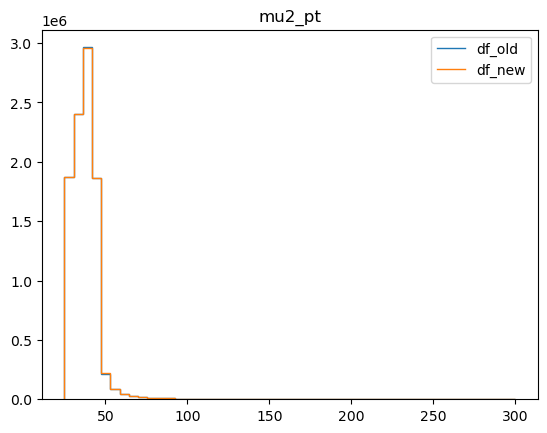

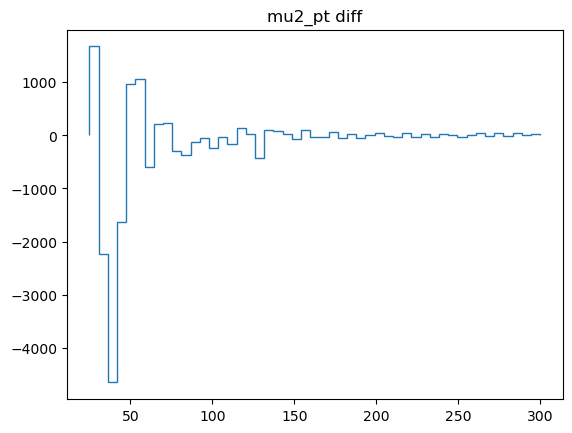

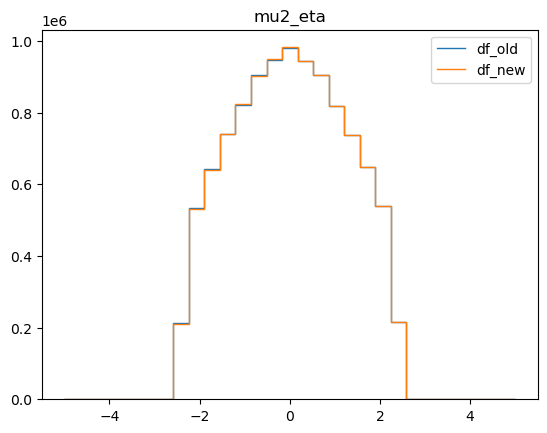

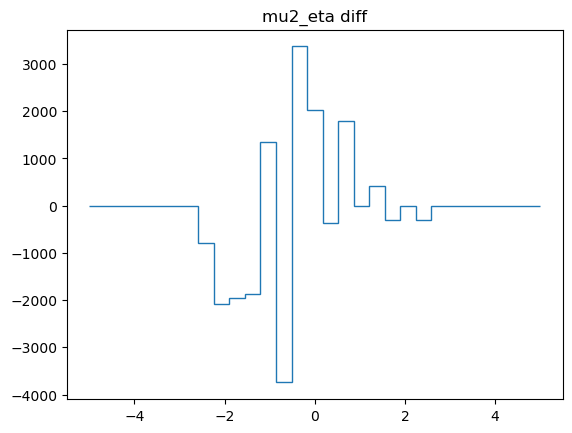

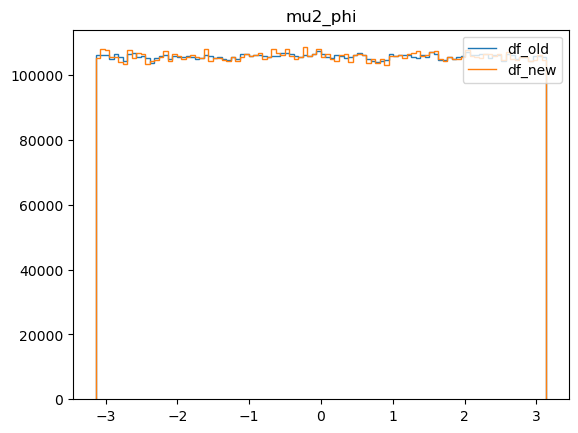

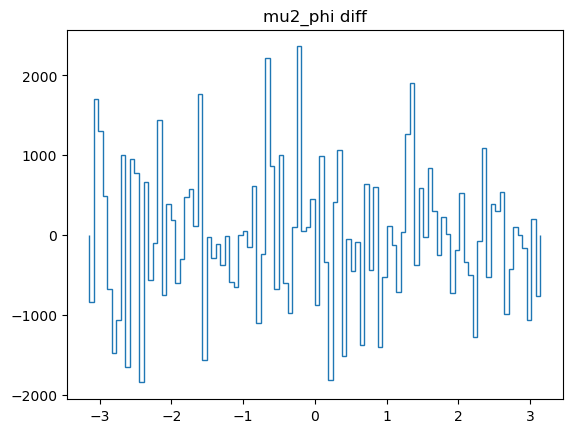

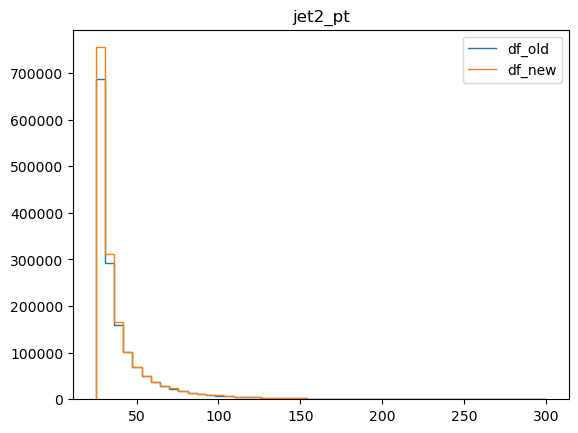

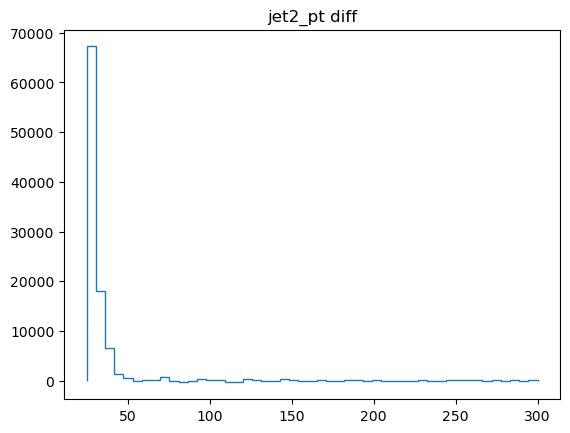

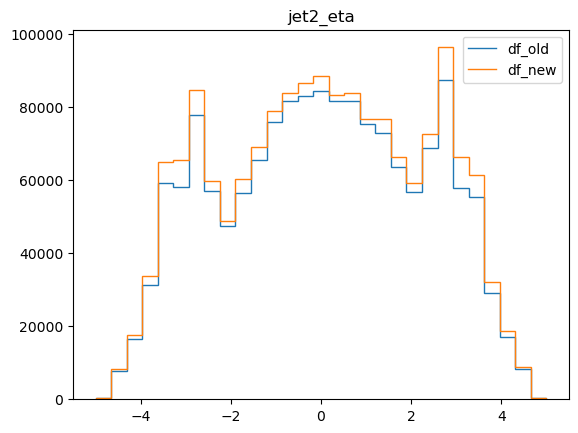

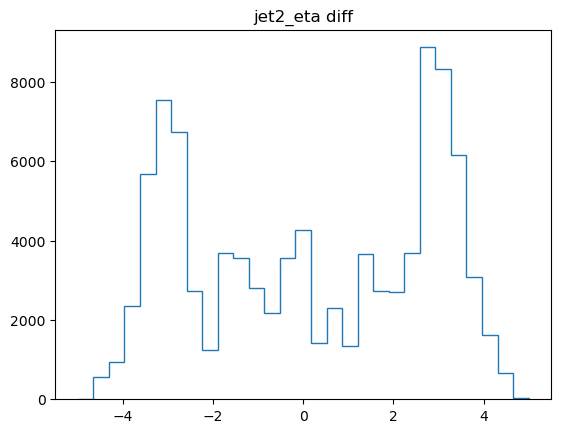

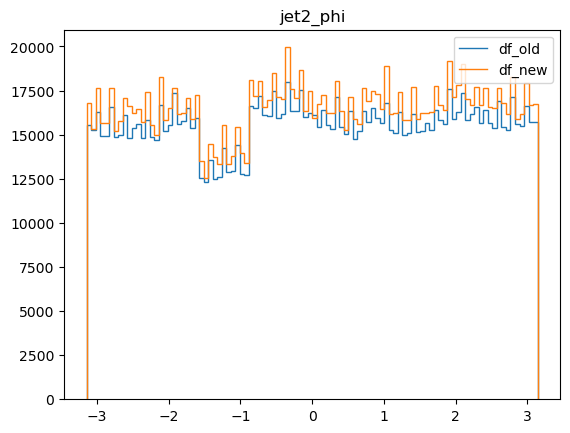

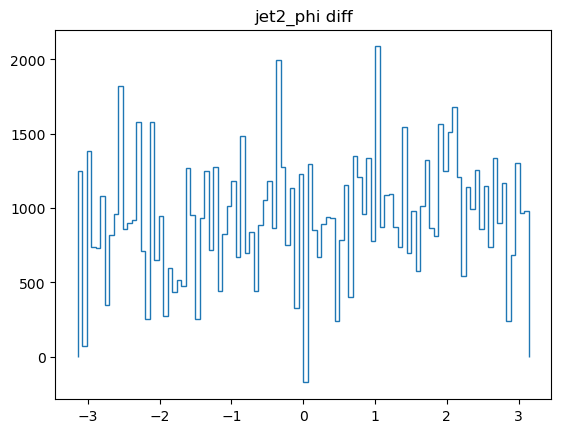

In [40]:
"""
For mu2, special condition is needed bc when there's only one muon, mu2==mu1 in copperhead
"""
# var = "mu1_pt"
# var = "dimuon_mass"
# var = "jet1_pt"
# variables = ["mu1_pt", "mu2_pt", "dimuon_mass"]
variables = ["mu2_pt","mu2_eta", "mu2_phi", 
             # "jet2_mass", 
             "jet2_pt", "jet2_eta", "jet2_phi"
            ]
    
for var in variables:
    kin = var.split("_")[-1]
    # binning = np.linspace(*[25, 300, 50])
    binning = np.linspace(*binning_map[kin])
    # the way copperheadV1 defines mu2 is the muon with the lowest pt, thus the
    # only way to make copperheadV1 and copperheadV2 same is to ensure nmuons ==2
    # if 'mu' in var:
    #     nvars_new = df_new["nmuons"].compute()
    #     nvars_old = df_old["nmuons"].compute()
    # else:
    #     nvars_new = df_new["njets"].compute()
    #     nvars_old = df_old["njets"].compute()
    # hist_old, edges = np.histogram(df_old[nvars_old ==2][var].compute(), bins=binning , weights=weights_old[nvars_old ==2])
    # hist_new, _= np.histogram(df_new[nvars_new ==2][var].compute(), bins=binning , weights=weights_new[nvars_new ==2])
    hist_old, edges = np.histogram(df_old[var].compute(), bins=binning , weights=weights_old)
    hist_new, _= np.histogram(df_new[var].compute(), bins=binning , weights=weights_new)
    
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.show()